# Analyze Baseball Stats with Pandas and Matplotlib ⚾️

Project Tutorial link: https://www.codedex.io/projects/analyze-baseball-stats-with-pandas-and-matplotlib

### Initial Data Exploration

Let's begin by looking at the file **Batting.csv**.

In [51]:
import pandas as pd

# Load batting data
batting = pd.read_csv('Batting.csv')
batting.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,1,CHN,NL,45,2,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,1,CHA,AL,25,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,1,BOS,AL,47,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,1,SEA,AL,73,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2010,1,SEA,AL,53,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2012,1,NYA,AL,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,aardsda01,2013,1,NYN,NL,43,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,aardsda01,2015,1,ATL,NL,33,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
9,aaronha01,1954,1,ML1,NL,122,468,58,131,27,...,69.0,2.0,2.0,28,39.0,NaN,3.0,6.0,4.0,13.0


Each row represents the batting information for a player for a given year. For example, the first row shows that the player with the ID of `aardsda01` only played in `11` games in `2004` and had no hits or runs!

Let's begin exploring our data about individual players by getting a sense of the total scale. 

Let's answer questions like:
- How many unique players are there?
- What years are covered?
- What is the average number of runs a player scores in a single year?

We can start by looking at `.describe()`.


In [52]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,128598.000000,128598.000000,128598.000000,128598.000000,128598.000000,128598.000000,128598.000000,128598.000000,128598.000000,127842.000000,126052.000000,96103.000000,128598.000000,119739.000000,82071.000000,125782.000000,122530.000000,81934.000000,93166.000000
mean,1967.529091,1.090515,47.295798,129.389376,17.290953,33.766272,5.768674,1.154497,2.688300,15.708726,2.721052,1.108394,11.926523,20.160190,0.962411,1.014120,2.032196,0.983792,2.767780
std,40.919857,0.314065,45.837715,177.034184,26.956123,50.054548,9.272108,2.461973,6.197295,25.249239,7.197206,2.608783,19.727894,29.328141,2.590036,2.250185,3.942554,1.893025,4.589461
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1933.000000,1.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1975.000000,1.000000,31.000000,40.000000,3.000000,7.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2004.000000,1.000000,71.000000,195.000000,24.000000,48.000000,8.000000,1.000000,2.000000,21.000000,2.000000,1.000000,16.000000,28.000000,1.000000,1.000000,2.000000,1.000000,4.000000
max,2025.000000,6.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


The dataset goes from 1871-2025!

We can also find summary statistics about specific columns:

In [53]:
batting['yearID'].min()

1871

Let's see how many unique players we have:

In [54]:
len(batting['playerID'].unique())

24011

Alternatively, we can use `.nunique()`

In [55]:
batting['playerID'].nunique()

24011

### Filtering Out Inactive Players

A lot of players in the dataset have 0 at-bats. They're on teams, but they never play! This can drag down some statistics, so let's filter those players out:

In [56]:
active_players = batting[batting['AB'] > 0]
active_players.describe()


,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,106470.000000,106470.000000,106470.000000,106470.000000,106470.000000,106470.000000,106470.000000,106470.000000,106470.000000,105715.000000,103927.000000,74495.000000,106470.000000,97871.000000,60574.000000,103657.000000,100421.000000,60441.000000,71564.000000
mean,1961.015610,1.087217,52.752775,156.280783,20.881253,40.784024,6.967597,1.394440,3.247018,18.996500,3.299662,1.429358,14.402808,24.664722,1.303942,1.230385,2.477330,1.333532,3.603250
std,40.618563,0.309582,47.736202,183.445456,28.332393,52.344675,9.771709,2.643194,6.676413,26.617856,7.804549,2.884041,20.843173,30.679386,2.940012,2.424457,4.226708,2.095587,4.940732
min,1871.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1928.000000,1.000000,13.000000,14.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1964.000000,1.000000,35.000000,68.000000,7.000000,14.000000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,4.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1998.000000,1.000000,85.000000,255.000000,32.000000,65.000000,11.000000,2.000000,3.000000,28.000000,3.000000,2.000000,21.000000,34.000000,1.000000,1.000000,3.000000,2.000000,6.000000
max,2025.000000,6.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


The average number of runs scored by a player shot up to `20.88` after filtering out all of the players who were always on the bench.

### Finding Top Performers

If we use `.groupby()` we can find statistics for a particular player, year, or even team. For example, we can find the total number of career home runs for each player with this line of code:


In [57]:
batting.groupby('playerID')['HR'].sum().sort_values(ascending=False)

playerID
bondsba01    762
aaronha01    755
ruthba01     714
pujolal01    703
rodrial01    696
            ... 
hostech01      0
hostge01       0
hottmke01      0
hottoto01      0
zychto01       0
Name: HR, Length: 24011, dtype: int64

You might recognize some familiar names here! These are the all time home run hitters: Barry Bonds, Hank Arron, Babe Ruth, and so on.

Let's see how dominant Babe Ruth was compared to his peers. We will filter for only players that played the same years as him. To do this, we'll need to find what years he started and ended his career:


In [58]:
babe_ruth = batting[batting['playerID'] == 'ruthba01']

# Finding the starting and ending years
start_year = babe_ruth['yearID'].min()
end_year = babe_ruth['yearID'].max()

print(start_year)
print(end_year)

1914
1935


Now we can use these years a filter for our entire dataset and find the total number of home runs per player for just those years:

In [59]:
ruth_years = batting[(batting["yearID"] >= start_year) & (batting["yearID"] <= end_year)]

# Finding the home run leaders during that time
ruth_years.groupby('playerID')['HR'].sum().sort_values(ascending=False)


playerID
ruthba01     714
gehrilo01    378
foxxji01     302
hornsro01    300
simmoal01    256
            ... 
jaggecl01      0
jamerle01      0
jamesbi01      0
jamesbi02      0
abramge01      0
Name: HR, Length: 4689, dtype: int64

Wow, Babe Ruth had almost twice the number of home runs as the next best player!

### Graphing Data By Year

Because baseball has such a long history, it can be interesting to see how the game changed over time. If we use `.groupby()` to group years together, we can then use the graphing library Matplotlib to visualize some interesting stats. Let's give it a shot by plotting how the total number of home runs have changed over time!

First, let's find the total number of home runs per year. This will look very familiar to what we just did, except we're now grouping by `yearID`:


In [60]:
total_hr_by_year = batting.groupby('yearID')['HR'].sum()

total_hr_by_year

yearID
1871      47
1872      37
1873      47
1874      40
1875      40
        ... 
2021    5944
2022    5215
2023    5868
2024    5453
2025    5650
Name: HR, Length: 155, dtype: int64

We can now plot this using Matplotlib's `.plot()` function. This function needs a list of X and Y values. In our case, we want the year to be on the X axis and the total number of home runs to be on the Y axis:


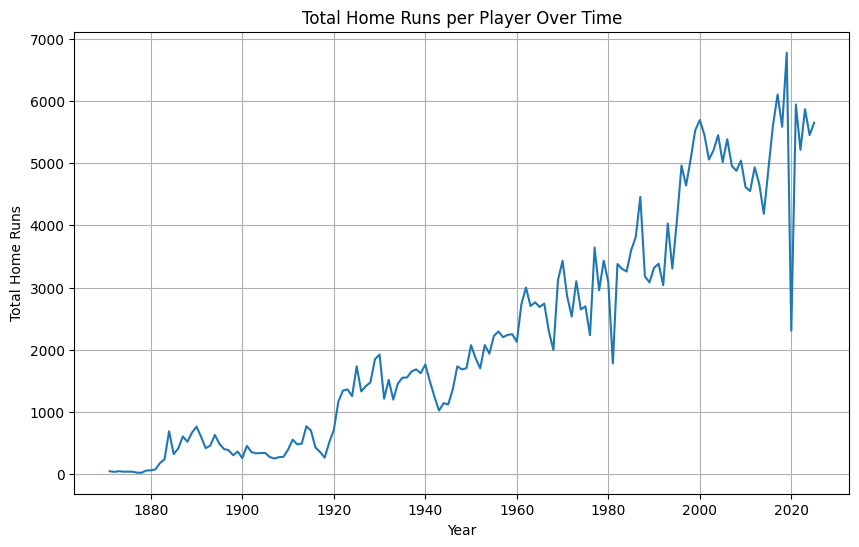

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(total_hr_by_year.index, total_hr_by_year.values)

# Adding labels
plt.title('Total Home Runs per Player Over Time')
plt.xlabel('Year')
plt.ylabel('Total Home Runs')

plt.grid(True)
plt.show()

It's interesting that you can see the abbreviated 2020 season in this graph! They played about half as many games that year due to COVID.

### Your Favorite Team vs. The League

Another fun visualization that you can create is a comparison of your favorite team's stats to the rest of the league. I grew up in Denver, so my team is the Colorado Rockies, who have been laughably bad for the majority of my life 😅. 

That being said, there is an interesting phenomenon with the Rockies: it is very easy to hit home runs in Denver because of the altitude. As a result, even though the Rockies are generally a fairly weak team, they end up hitting more home runs than their competitors. Let's graph the Rockies' home runs every year against the league average!

First, we can group the data by year and team to find each team's home runs for a given year:

In [62]:
team_hr_per_year = (
  batting
  .groupby(['yearID', 'teamID'])['HR']
  .sum()
  .reset_index()
)

team_hr_per_year

,yearID,teamID,HR
0,1871,BS1,3
1,1871,CH1,10
2,1871,CL1,7
3,1871,FW1,2
4,1871,NY2,1
...,...,...,...
3608,2025,SLN,148
3609,2025,TBA,182
3610,2025,TEX,175
3611,2025,TOR,191


Then, to find the Rockies specifically, we can filter by `teamID`:


In [63]:
rockies_hr = (
  team_hr_per_year
  [team_hr_per_year["teamID"] == 'COL']
  .set_index('yearID')['HR']
)

rockies_hr

yearID
1993    142
1994    125
1995    200
1996    221
1997    239
1998    183
1999    223
2000    161
2001    213
2002    152
2003    198
2004    202
2005    150
2006    157
2007    171
2008    160
2009    190
2010    173
2011    163
2012    166
2013    159
2014    186
2015    186
2016    204
2017    192
2018    210
2019    224
2020     63
2021    182
2022    149
2023    163
2024    179
2025    160
Name: HR, dtype: int64

We can also find the league average for each year. We'll also filter out anything before 1993, since that is the year the Rockies were created:


In [64]:
league_avg_hr = (
  team_hr_per_year
  .groupby('yearID')['HR']
  .mean()
)

league_avg_hr = league_avg_hr[league_avg_hr.index >= 1993]
league_avg_hr

yearID
1993    143.928571
1994    118.071429
1995    145.750000
1996    177.214286
1997    165.714286
1998    168.800000
1999    184.266667
2000    189.766667
2001    181.933333
2002    168.633333
2003    173.566667
2004    181.700000
2005    167.233333
2006    179.533333
2007    165.233333
2008    162.600000
2009    168.066667
2010    153.766667
2011    151.733333
2012    164.466667
2013    155.366667
2014    139.533333
2015    163.633333
2016    187.000000
2017    203.500000
2018    186.166667
2019    225.866667
2020     76.800000
2021    198.133333
2022    173.833333
2023    195.600000
2024    181.766667
2025    188.333333
Name: HR, dtype: float64

Finally, we can put this all together by graphing these two lines:


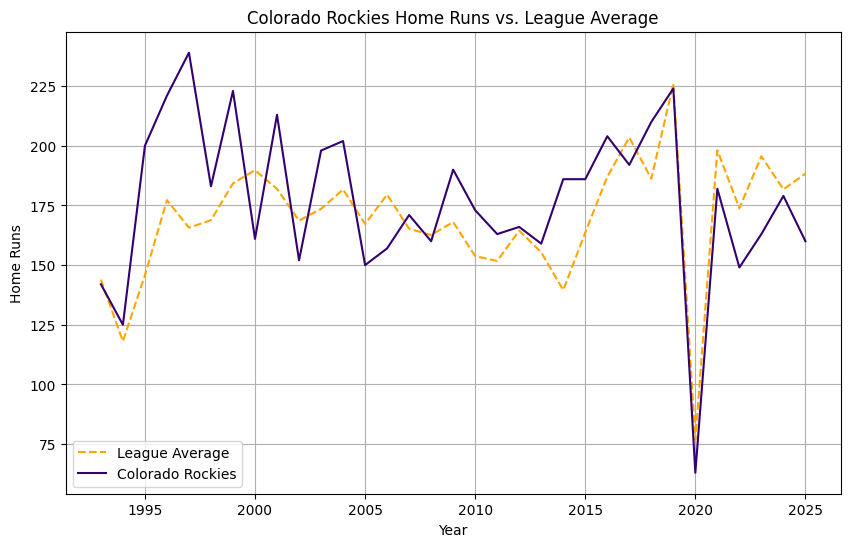

In [65]:
plt.figure(figsize=(10, 6))

plt.plot(
  league_avg_hr.index,
  league_avg_hr.values,
  label='League Average',
  color='orange',
  linestyle='--'
)

plt.plot(
  rockies_hr.index,
  rockies_hr.values,
  label='Colorado Rockies',
  color='#33006F'
)

plt.title('Colorado Rockies Home Runs vs. League Average')
plt.xlabel('Year')
plt.ylabel('Home Runs')
plt.legend()

plt.grid(True)
plt.show()

### Replicating Moneyball

Finally, let's take on a challenge of replicating the work Billy Bean and Peter Brand did for the Oakland A's in _Moneyball_. While they almost certainly considered many statistics, they are most famous for finding players with a high **on-base percentage** (OBP) relative to their cost.

Let's first add an OBP column to our table:

In [66]:
# Fill missing values to avoid NaN issues
batting[['BB', 'HBP', 'SF']] = batting[['BB', 'HBP', 'SF']].fillna(0)

# Create OBP column
batting['OBP'] = (
  (batting['H'] + batting['BB'] + batting['HBP']) /
  (batting['AB'] + batting['BB'] + batting['HBP'] + batting['SF'])
)

# If we got NaN due to no plate appearances, then fill with 0.
batting['OBP'] = batting['OBP'].fillna(0)
batting.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP
0,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,aardsda01,2006,1,CHN,NL,45,2,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
2,aardsda01,2007,1,CHA,AL,25,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,aardsda01,2008,1,BOS,AL,47,1,0,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,aardsda01,2009,1,SEA,AL,73,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,aardsda01,2010,1,SEA,AL,53,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,aardsda01,2012,1,NYA,AL,1,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,aardsda01,2013,1,NYN,NL,43,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,aardsda01,2015,1,ATL,NL,33,1,0,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,aaronha01,1954,1,ML1,NL,122,468,58,131,27,...,2.0,2.0,28,39.0,NaN,3.0,6.0,4.0,13.0,0.322068


#### Joining with the Salaries Table

Every row in the Batting table contains information about a player (`playerID`) in a given year (`yearID`) on a given team (`teamID`). We'll want to match all three of those pieces of information with the rows in the Salaries table.


In [67]:
# Load data
salaries = pd.read_csv('Salaries.csv')

# Merge salary data into batting data
batting_with_salary = batting.merge(
  salaries,
  on=['playerID', 'yearID', 'teamID'],
  how='left'
)

batting_with_salary.head()


,playerID,yearID,stint,teamID,lgID_x,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,lgID_y,salary
0,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NL,300000.0
1,aardsda01,2006,1,CHN,NL,45,2,0,0,0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
2,aardsda01,2007,1,CHA,AL,25,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AL,387500.0
3,aardsda01,2008,1,BOS,AL,47,1,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,AL,403250.0
4,aardsda01,2009,1,SEA,AL,73,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AL,419000.0


#### Calculating Value

We can now find the "value" of a player by calculating their OBP divided by their salary. There are a few edge cases to consider before finding our final values:
- We'll want to remove anyone with a salary or OBP of `0`
- We'll want to remove anyone with under 200 at bats. This will help us filter out any players who are outliers due to lack of playtime.


In [68]:
value_df = batting_with_salary[
  (batting_with_salary['salary'] > 0) &
  (batting_with_salary['OBP'] > 0) &
  (batting_with_salary['AB'] >= 200)
].copy()

value_df.head()

,playerID,yearID,stint,teamID,lgID_x,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,lgID_y,salary
113,abbotje01,1998,1,CHA,AL,89,244,33,68,14,...,9,28.0,1.0,0.0,2.0,5.0,2.0,0.298450,AL,175000.0
115,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,21,38.0,1.0,2.0,2.0,1.0,2.0,0.343096,AL,255000.0
131,abbotku01,1994,1,FLO,NL,101,345,41,86,17,...,16,98.0,1.0,5.0,3.0,2.0,5.0,0.290761,NL,109000.0
132,abbotku01,1995,1,FLO,NL,120,420,60,107,18,...,36,110.0,4.0,5.0,2.0,5.0,6.0,0.317597,NL,119000.0
133,abbotku01,1996,1,FLO,NL,109,320,37,81,18,...,22,99.0,1.0,3.0,4.0,0.0,7.0,0.307246,NL,250000.0


We now have a DataFrame named `value_df` that contains only the rows we're interested in. Let's calculate each player's value and sort by the highest value players! We'll display only the columns that are relevant to us.

In [69]:
# Create value metric
value_df['OBP_per_dollar'] = value_df['OBP'] / value_df['salary']

value_df_sorted = value_df.sort_values(
  by='OBP_per_dollar',
  ascending=False
)

value_df_sorted [[
  'playerID',
  'yearID',
  'teamID',
  'OBP',
  'salary',
  'OBP_per_dollar'
]].head()


,playerID,yearID,teamID,OBP,salary,OBP_per_dollar
63670,krukjo01,1986,SDN,0.403077,60000.0,0.000007
104358,seitzke01,1987,KCA,0.399171,62500.0,0.000006
127820,youngge02,1987,HOU,0.379538,62500.0,0.000006
75381,mcgrifr01,1987,TOR,0.376404,62500.0,0.000006
72063,martida01,1987,CHN,0.371869,62500.0,0.000006


Our results are a handful of players from the 1980s. This makes sense; salaries were likely much lower in the 80s, but OBP stayed roughly the same. So those players will seemingly be much more "valuable" than modern day players.

If we wanted to see if our calculations were working correctly, we could choose to only look at players from a single year. For example, this gives us the most "valuable" players from 2010.:


In [70]:
value_df_sorted[value_df_sorted['yearID'] == 2010][[
  'playerID',
  'yearID',
  'teamID', 
  'AB',
  'OBP',
  'salary',
  'OBP_per_dollar'
]].head()


,playerID,yearID,teamID,AB,OBP,salary,OBP_per_dollar
51477,heywaja01,2010,ATL,520,0.393258,400000.0,9.831461e-07
47326,hanigry01,2010,CIN,203,0.404959,415000.0,9.758040e-07
6020,bartoda02,2010,OAK,556,0.393175,410000.0,9.589636e-07
42639,gonzaca01,2010,COL,587,0.375786,406000.0,9.255817e-07
38348,freesda01,2010,SLN,240,0.360902,400000.0,9.022556e-07


I went to look up `heywaja01` on baseball-reference.com, and it turns out that this data was from a player named Jason Heyward. In 2010, he was an All Star and got 2nd place in voting for Rookie of the Year! It certainly sounds like a player that was high value.